<a href="https://colab.research.google.com/github/FelipeFerAl/Data_Analytics/blob/main/DatosFaltantes_Transformaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Manejo de datos faltantes con Python

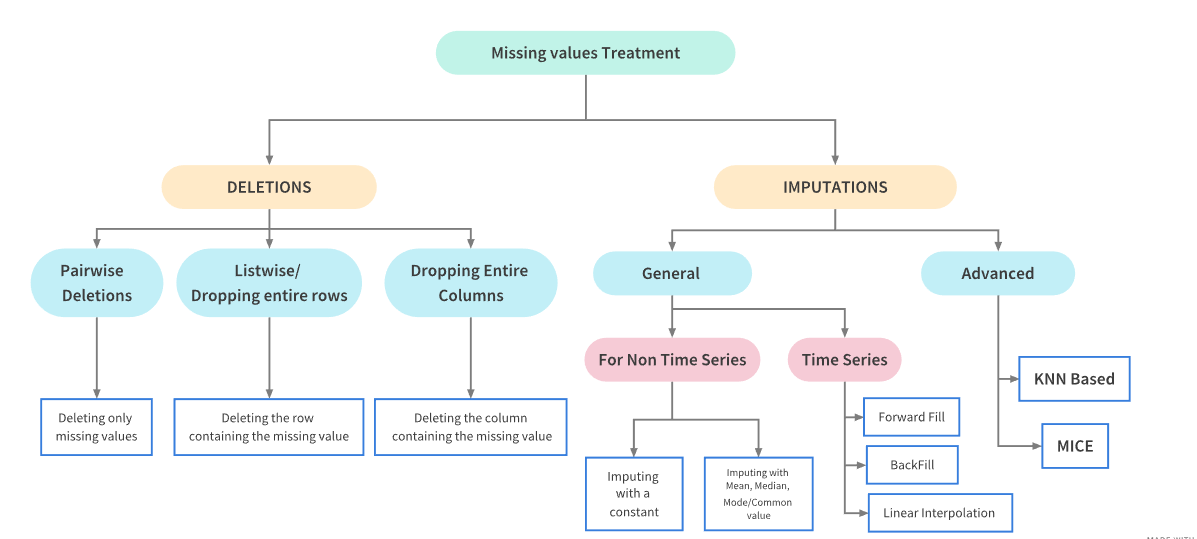

## Base de datos - [Titanic_dataset.csv](https://www.kaggle.com/c/titanic/data)

In [ ]:
# Importar librerías de soporte
import pandas as pd
import numpy as np

In [ ]:
# Importar base de datos
df = pd.read_csv("/content/titanic_dataset.csv")

# Ver las primeras 5 muestras de la base de datos
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


## Eliminar columnas de la base de datos

In [ ]:
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

print(df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


## Tratamiento de datos categóricos

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
newdf=df

In [ ]:
print(newdf.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0         0       3    1  22.0      1      0   7.2500
1         1       1    0  38.0      1      0  71.2833
2         1       3    0  26.0      0      0   7.9250
3         1       1    0  35.0      1      0  53.1000
4         0       3    1  35.0      0      0   8.0500


## Extracción de variable target

In [ ]:
#splitting the data into x and y
y = df['Survived']
df.drop("Survived",axis=1,inplace=True)

## Identificación de valores faltantes

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


¿Algún comentario?

In [ ]:
print(df.isnull().sum())

Pclass      0
Sex         0
Age       177
SibSp       0
Parch       0
Fare        0
dtype: int64


¿Algún comentario?

## Intentemos crear un modelo de regresión logística para predecir si alguien sobrevive o no!

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Métodos para abordar los valores faltantes

### 1. Eliminar muestras o variables
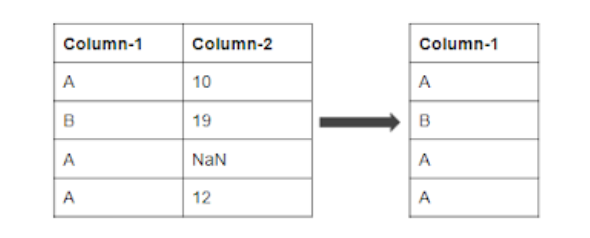

In [ ]:
updated_df = df.dropna(axis=1)

In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7910447761194029


### 2. Eliminar las muestras con datos faltantes



*   axis=1 is used to drop the column with NaN values.
*   axis=0 is used to drop the row with NaN values.






In [ ]:
df = pd.read_csv("/content/titanic_dataset.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

print(df.head())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

updated_df = df.dropna(axis=0)

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [ ]:
y1 = updated_df['Survived']
updated_df.drop("Survived",axis=1,inplace=True)

<ipython-input-33-21ab342d6fe5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_df.drop("Survived",axis=1,inplace=True)


In [ ]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.827906976744186


### Imputación de datos faltantes
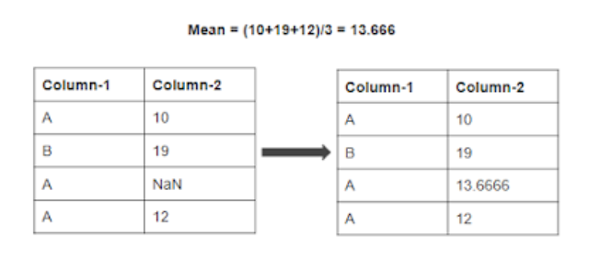

Las posibles formas de hacer esto son:

* Completar los datos faltantes con el valor medio o mediano si es una variable numérica.
* Completar los datos faltantes con moda si es un valor categórico.
* Completar el valor numérico con 0 o -999, o algún otro número que no aparecerá en los datos. Esto se puede hacer para que la máquina pueda reconocer que los datos no son reales o son diferentes.
* Llenar el valor categórico con un nuevo tipo para los valores faltantes.

In [ ]:
df = pd.read_csv("/content/titanic_dataset.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

print(df.head())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [ ]:
updated_df = df
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [ ]:
y1 = updated_df['Survived']
updated_df.drop("Survived",axis=1,inplace=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.8283582089552238


## Otro tipo de imputación de datos faltantes
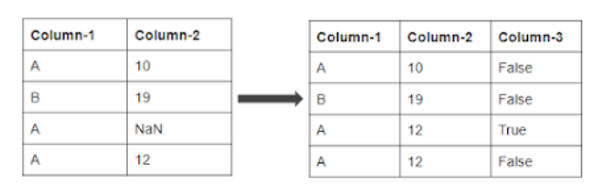

In [ ]:
df = pd.read_csv("/content/titanic_dataset.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

print(df.head())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [ ]:
updated_df = df
updated_df['Ageismissing'] = updated_df['Age'].isnull()
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')

updated_df = pd.DataFrame(my_imputer.fit_transform(updated_df), columns = df.columns)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        891 non-null    float64
 2   Sex           891 non-null    float64
 3   Age           891 non-null    float64
 4   SibSp         891 non-null    float64
 5   Parch         891 non-null    float64
 6   Fare          891 non-null    float64
 7   Ageismissing  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [ ]:
y1 = updated_df['Survived']
updated_df.drop("Survived",axis=1,inplace=True)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7686567164179104


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Completar datos faltantes con un modelo de [regresión lineal](https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/)

* En este caso, el modelo de regresión contendrá todas las columnas excepto Age en $X$ y Age en $Y$.

In [ ]:
df = pd.read_csv("/content/titanic_dataset.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

print(df.head())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare
0         0       3    male  22.0      1      0   7.2500
1         1       1  female  38.0      1      0  71.2833
2         1       3  female  26.0      0      0   7.9250
3         1       1  female  35.0      1      0  53.1000
4         0       3    male  35.0      0      0   8.0500


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [ ]:
testdf = df[df['Age'].isnull()==True]
traindf = df[df['Age'].isnull()==False]

In [ ]:
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)

<ipython-input-11-92785c19cb0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Age",axis=1,inplace=True)


LinearRegression()

In [ ]:
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

<ipython-input-12-442d435bb586>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Age",axis=1,inplace=True)
<ipython-input-12-442d435bb586>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Age']= pred


Luego, después de completar los valores en la columna Edad, usaremos la regresión logística para calcular la precisión.

In [ ]:
traindf['Age']=y

<ipython-input-13-09294d128ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Age']=y


In [ ]:
y = traindf['Survived']
traindf.drop("Survived",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(traindf,y)

<ipython-input-14-6639128dc763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Survived",axis=1,inplace=True)


LogisticRegression()

In [ ]:
y_test = testdf['Survived']
testdf.drop("Survived",axis=1,inplace=True)
pred = lr.predict(testdf)

<ipython-input-15-9b92d9609b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Survived",axis=1,inplace=True)


In [ ]:
import sklearn.metrics as metrics
print(metrics.accuracy_score(pred,y_test))

0.8361581920903954


## Ejercicio: Discretizar la variable edad
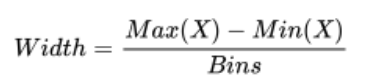

Por ejemplo, si los valores de la variable varían entre 0 y 100, podemos crear cinco contenedores como este: ancho = (100-0) / 5 = 20; los contenedores serán 0-20, 20-40, 40-60, 80-100.

In [ ]:
### Código aquí ###